In [15]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import datasets, model_selection
import pandas as pd

# df = pd.read_csv("NEWTAYLORCATS.csv")
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# df = df.dropna(subset = ["pattern"]) 
# print(df.shape)

# sdf = pd.read_csv("spotifywithpatterns.csv")
# sdf = sdf.loc[:, ~sdf.columns.str.contains('^Unnamed')]
# print(sdf.shape)
# print(sdf.head(1))
# df.head(1)

df = pd.read_csv("spotifycats.csv")
df.head()


d = pd.read_csv("spotify.csv")
d.head()

,Unnamed: 0,album_name,track_name,artist,featuring,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,explicit,key_name,mode_name,key_mode
0,0,Taylor Swift,Tim McGraw,Taylor Swift,NaN,0.580,0.491,0,-6.462,1,...,0.0,0.1210,0.425,76.009,4,232107,False,C,major,C major
1,1,Taylor Swift,Picture To Burn,Taylor Swift,NaN,0.658,0.877,7,-2.098,1,...,0.0,0.0962,0.821,105.586,4,173067,False,G,major,G major
2,2,Taylor Swift,Teardrops On My Guitar,Taylor Swift,NaN,0.621,0.417,10,-6.941,1,...,0.0,0.1190,0.289,99.953,4,203040,False,A#,major,A# major
3,3,Taylor Swift,A Place In This World,Taylor Swift,NaN,0.576,0.777,9,-2.881,1,...,0.0,0.3200,0.428,115.028,4,199200,False,A,major,A major
4,4,Taylor Swift,Cold As You,Taylor Swift,NaN,0.418,0.482,5,-5.769,1,...,0.0,0.1230,0.261,175.558,4,239013,False,F,major,F major


In [8]:
import math

#feature selection: 
#cols = df.columns[6:24]
# print(cols)
#df['parts1'] = df['parts'].str.len()
data=df[['positive_emotion','negative_emotion']]
#data = df[cols]
target = df['valence']* 100
#target = pd.Categorical(target)
#print(target)

data = data.values
target = target.values 
t = []
for i in target:
    j = int(i)
    #print(i)
    if(j <= 20):
        t.append(1)
    if((j > 20) & (j <= 40)):
        t.append(2)
    if((j > 40) & (j <= 60)):
        t.append(3)
    if((j > 60) & (j <= 80)):
        t.append(4)
    if((j > 80) & (j <= 100)):
        t.append(5)

#     if(j <= 33):
#         t.append(1)
#     if((j > 33) & (j <= 66)):
#         t.append(2)
#     if (j > 66):
#         t.append(3)

    #t.append(math.floor(i))
target=pd.DataFrame(np.asarray(t))
# print(target)
#target = pd.Categorical(target).codes



x_train, x_test, y_train, y_test = \
    model_selection.train_test_split(data, target, test_size=0.2)

# print(x_train)
# print(y_train)
# print(x_train.shape)
# print(y_train.shape)

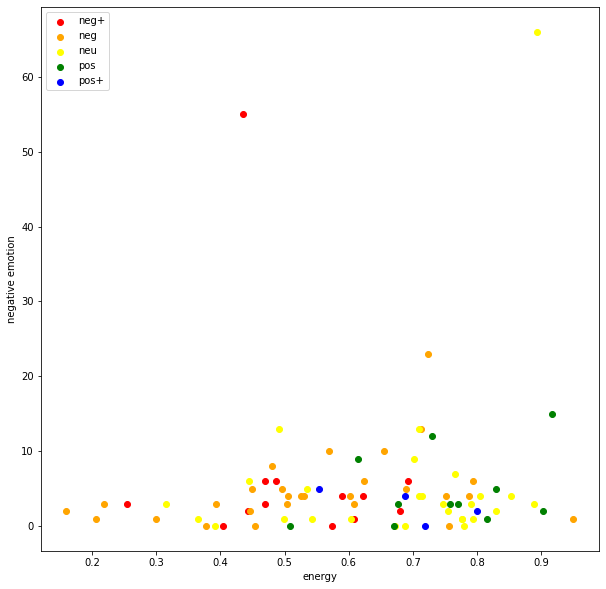

In [9]:
import matplotlib
import matplotlib.cm as cm

labels = {1: "neg+", 2: "neg", 3: "neu", 4:"pos", 5:'pos+'}
#labels = {1: "neg", 2: "neu", 3:"pos"}

#clrs=[1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
colors = ['red','orange','yellow', 'green', 'blue']
def isNum(num):
    if num!= num : 
        return False
    else : 
        return True
    
def plot_data(x, y, labels, colours):
    #c = pd.Categorical(y).codes
   # c = np.unique(c)
    #print(c.shape)
    #print(np.arrange(c))
    xx = []
    yy = []
    cc=[]
    for y_class in np.unique(y):
        index = np.where(y == y_class)
       # plt.scatter(x[index,0].tolist()[0],x[index,1].tolist()[0],c=cc,cmap='viridis')
        plt.scatter(x[index,0].tolist()[0], x[index, 1].tolist()[0] 
                    ,label= labels[y_class], c=colours[y_class-1])                    
                    #,c=y[np.where(y==y_class)], cmap='viridis', vmin=0, vmax=100)
                   
        plt.legend()
        plt.xlabel("energy")
        plt.ylabel("negative emotion")
   # plt.set_cmap('viridis')    
   # plt.colorbar()

plt.figure(figsize=(10, 10))
plot_data(x_train, y_train, labels, colors)
# plt.xticks(np.arange(0, 30, 5))
# plt.xlim(-1, 30)
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [11]:
# importing standard scaler
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.fit_transform(x_test)

In [12]:
# importing classifier
from sklearn.naive_bayes import BernoulliNB

# initializaing the NB
classifer = BernoulliNB()

# training the model
classifer.fit(x_train, y_train)

# testing the model
y_pred = classifer.predict(x_test)

C:\Users\lilyg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_pred, y_test))

0.2857142857142857
